ExamJanuary_2022_problem

December 4, 2024

1 Exam 2021, 8.00-13.00 for the course 1MS041 (Introduction to

1.1

Data Science / Introduktion till dataanalys)

Instructions:

1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.
This exam has 3 problems for a total of 40 points, to pass you need 20 points.
1.2 Some general hints and information:

• Try to answer all questions even if you are uncertain.
Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
• Follow the instruction sheet rigorously.

• This exam is partially autograded, but your code and your free text answers are manually
graded anonymously.
• If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
• 1 (Benny) will visit the exam room at around 10:30 to see if there are any questions.
1.3 Tips for free text answers

• Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring
to.
If you want to include math, you can write LaTeX in the Markdown cells, for instance
$\$f(x)=x^{-}2\$$ will be rendered as $f(x)=x^{2}$ and $\$\$f(x)=x^{\neg}2\$\$$ will become an equation
line, as follows

$f(x)=x^{2}$

Another example is \$\$f_{Y \mid X$\{(y,x)=p(Y=y~lnid~X=x)=\lambda exp(\backslash alpha$
\cdot x + \beta) \$\$ which renders as

$f_{Y|X}(y,x)=P(Y=y|X=x)=exp(\alpha\cdot x+\beta)$

1.4 Finally some rules:
• You may not communicate with others during the exam, for example:
You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
You may not communicate with Al's, for instance ChatGPT.

Your on-line and off-line activity is being monitored according to the examination rules.

1.5 Good luck!

# Insert your anonymous exam ID as a string in the variable below
examID="XXX"



1.6 Exam VB, PROBLEM 1

Maximum Points $=8$

1.7 Probability warmup

Let's say we have an exam question which consists of $20~yes/no$ questions.
From past performance of similar students, a randomly chosen student will know 
the correct answer to $N\sim binom(20,11/20)$ questions.
Furthermore, we assume that the student will guess the answer with equal probability
to each question they don't know the answer to, i.e. given N we define $Z\sim binom(20-N,1/2)$ as
the number of correctly guessed answers.
Define $Y=N+Z,$ i.e., Y represents the number of total
correct answers.
We are interested in setting a deterministic threshold T, i.e., we would pass a student at threshold
Tif $Y\ge T$ Here $T\in\{0,1,2,...,20\}$

1. [5p] For each threshold T, compute the probability that the student knows less than
10 correct answers given that the student passed, i.e., $N<10.$ Put the answer in
problem11_probabilities as a list.
2. [3p] What is the smallest value of T such that if $Y\ge T$ then we are 90% certain that $N\ge10^{\circ}$?




In [ ]:
# Part 1: Replace XXX to represent $P(N<10)$ for $T=[0,1,2,...,20]$, i.e. your answer
# should be a list of length 21.
import numpy as np
from scipy.special import binom as binomial 

# Use bayes formula (the full one since there is a dependency) to calculate the probabilities
# P(N<10|Y>=T) = (P(Y=>T|N<10)*P(N<10))/P(Y>=T)
for T in range(21):
    # Define p to use in the binomial distribution to make the calculation more clear
    p = 11/20
    # Now we calculate P(N<10)
    P_N_less_than_ten = sum([binomial(20, k) * ((p)**k) * ((1-p)**(20-k)) for k in range(10)])
        
    # Let us condition on N, i.e. fix N as n and calculate each case of N=n in the range(N-Z).
    # Then we can use the law of total probability and sum these values to get P(Y>=T).
    # 
    
    P_Z_geq_T = sum([1 for k in range(T-n, 20-n)])

    Z = np.random.binomial(20-N, 1/2)
    Y = N + Z
    #print(Y, p)
    if Y >= T:
        p = 9/20
        N = binomial(20, T) * (p**T) * ((1-p)**(20-T))
        #print(N)

problem11_probabilities =[XXX,XXX,...,XXX]

0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183
0.24928935982841183


NameError: name 'XXX' is not defined

In [ ]:

# Part 2: Give an integer between 0 and 20 which is the answer to 2.
problem12_T=XXX

1.8 Exam vB, PROBLEM 2

Maximum Points $=8$

1.9 Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be
built in the following three steps:


1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a
large M with a, b satisfying the Hull-Dobell (Thm 6.8)) of parameters.
Follow the instructions
in the code block.

2. [2p] Using a generator construct random numbers from the uniform [0, 1] distribution.
3. [4p] Using a uniform [0, 1] random generator, generate samples from

$p_{0}(x)=\frac{\pi}{2}|sin(2\pi x)|$, $x\in[0,1]$.
Using the Accept-Reject sampler (Algorithm 1 in TFDS notes) with sampling density given by
the uniform [0, 1] distribution.

In [1]:
def problem2_LCG(size=None, seed=0):
    """
    A linear congruential generator that generates pseudo random numbers
    according to size.
    Parameters
    size: an integer denoting how many samples should be produced
    seed: the starting point of the LCG, i.e. O in the notes.
    Returns
    out: a list of the pseudo random numbers
    """

    if size < 1:
        return np.zeros(1)

    M = 2**64 +1 
    a = 2**42 +1 
    b = 2**30 +1 
    xs = list()

    xs.append((a*seed+b) % M)
    
    for _ in range(1,size):
        xs.append((a*xs[-1]+b) % M)

    return np.array(xs)


In [2]:
def problem2_uniform(generator=None, period=1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.

    Parameters
    generator: a function of type generator (size, seed) and produces the same
                result as problem2_LCG, i.e. pseudo random numbers in the range (0,1,...
                4,period-1}
    period: the period of the generator
    seed: the seed to be used in the generator provided
    size: an integer denoting how many samples should be produced

    Returns
    out: a list of the uniform pseudo random numbers
    """

    # Create list of random numbers
    rs = generator(size=size, seed=seed)
    # Normalise them to be uniform on [0,1]
    rs = rs/np.abs(sum(rs))
    return rs

In [10]:
def problem2_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers
    and produces samples from $(pi/2)*abs(sin(x*2*pi))$ using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution

    Parameters
    generator: a function of the type generator (size, seed) that produces
                uniform pseudo random
                numbers from [0,1]
    seed: the seed to be used in the generator provided
    size: an integer denoting how many samples should be produced

    Returns
    out: a list of the pseudo random numbers with the specified distribution
    """
    result = list()
    i = 0
    m = np.pi/2
    while len(result) < n_iterations:
        x = uniformGenerator(size=1, seed=seed+i)[0]
        i +=1
        # The target density as a function of x:
        #f_x = (np.pi/2)*np.abs(np.sin(x*2*np.pi))
        # The sampling density which is = 1 (the area under the Uniform CDF = 1)
        #g = 1
        # Instead of calculating r using the formula below we can simplify the
        # expressions and cross out pi/2. 
        #r = f_x/(m*g)

        r = np.abs(np.sin(x*2*np.pi))
        # Draw a new Uniform number and use this as a threshold.
        u = uniformGenerator(size=1, seed=seed+i)
        i +=1
        if u <= r:
            result.append(x)



    return result

In [14]:
# If you managed to solve all three parts you can test the following code to
# see if it runs

# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath

# try with a larger number of samples, up to 10000 should run

import numpy as np

print("LCG output: %s" % problem2_LCG(size=10, seed=1))

period =2**64 +1

print("Uniform sampler %s" % problem2_uniform(generator=problem2_LCG, period=period, size=10, seed=1))

uniform_sampler = lambda size, seed: problem2_uniform(generator=problem2_LCG, period=period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator=uniform_sampler, n_iterations=2, seed=1))

LCG output: [4.39912025e+12 1.31962860e+13 1.38339585e+19 1.38305995e+19
 4.60049959e+18 3.43608050e+18 1.84055523e+19 4.54105369e+18
 1.80407112e+19 1.27762409e+19]
Uniform sampler [4.91715679e-08 1.47502690e-07 1.54630334e-01 1.54592788e-01
 5.14225039e-02 3.84071032e-02 2.05729739e-01 5.07580419e-02
 2.01651696e-01 1.42807598e-01]


KeyboardInterrupt: 

Accept-Reject sampler [0.23796462709189137, 0.32383276483316237, 0.2590084917154736, 0.6484972199788831, 0.6820045605879779, 0.20985124453651727, 0.38102068999577143, 0.2718754143840908, 0.35184625582788265, 0.243517762709337, 0.22418547484732643, 0.414743999308679, 0.6842409524120733, 0.32375334582076565, 0.27981547357298786, 0.799115369116727, 0.14533616183328069, 0.1995887063541001, 0.14595480067964695, 0.08109066462388448, 0.08352052115358566, 0.7601614783097744, 0.19453724793318106, 0.40397807494366633, 0.5811521325045647, 0.24648195966935815, 0.27958303860586786, 0.827170565342314, 0.24010303006625622, 0.08730148686581662, 0.9000582191556544, 0.3154351888034451, 0.6695350361882403, 0.0723665742694708, 0.9063711552614622, 0.8704757225324894, 0.6052398804018957, 0.3945198816852111, 0.5182100698662082, 0.5414206878934907, 0.2288289056770828, 0.25552750021061, 0.7815582961174371, 0.3241267240578728, 0.4439593943554271, 0.9015014086403796, 0.5809419058172387, 0.10794435509475586, 0.90

(array([ 1.,  1.,  0.,  0.,  2.,  3.,  3.,  0.,  4.,  3.,  4.,  1.,  1.,
         2.,  4.,  3.,  3.,  8.,  6.,  6.,  1.,  4.,  4.,  5.,  9.,  7.,
         6.,  4.,  4., 11.,  6.,  5.,  8.,  4.,  3., 12.,  9.,  8.,  5.,
        11.,  6., 11.,  6.,  9., 11., 13.,  5., 14.,  7.,  6., 10.,  7.,
         5.,  7., 10.,  7., 13., 12., 13., 13., 14., 12., 21., 15., 20.,
        17., 11., 13.,  8., 11., 22., 17., 15., 13., 18., 17., 20., 19.,
        19., 21., 12., 18., 14., 13., 17., 10., 10., 17., 18., 17., 14.,
        16., 17., 17., 24., 14., 20., 19., 14., 18., 18., 25., 22., 18.,
        24., 18., 29., 21., 14., 20., 22., 21., 21., 18., 20., 18., 18.,
        23., 23., 21., 23., 23., 13., 21., 17., 26., 24., 23., 16., 29.,
        21., 24., 27., 21., 22., 28., 31., 32., 17., 24., 28., 18., 24.,
        18., 35., 28., 27., 25., 18., 27., 15., 25., 29., 29., 22., 22.,
        16., 28., 25., 22., 18., 24., 26., 27., 15., 36., 23., 33., 27.,
        21., 26., 24., 25., 28., 21., 31., 28., 31.

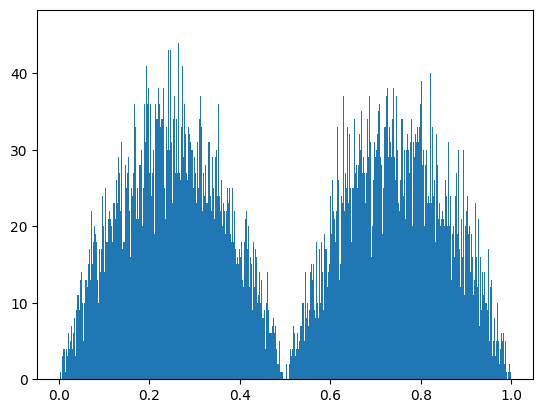

In [15]:
# If however you did not manage to implement either part 1 or part 2 but still
# want to check part 3, you can run the code below
import matplotlib.pyplot as plt
def testUniformGenerator(size,seed):
    import random
    random.seed(seed)
    
    return [random.uniform(0,1) for s in range(size)]

res = problem2_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20000, seed=1)

print("Accept-Reject sampler %s" % res)
plt.hist(res, bins=1000)

1.11 Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [0.4 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $

$P(X - \mathbb{E}[X] \ge \epsilon) \le C_1e^{-C_2n\epsilon^2} \land C_3e^{-C_4n(\epsilon+1)}$.

1. The empirical mean of i.i.d. sub-Gaussian random variables?
2. The empirical mean of i.i.d. sub-Exponential random variables?
3. The empirical mean of i.i.d. random variables with finite variance?
4. The empirical variance of i.i.d. random variables with finite variance?
5. The empirical variance of i.i.d. sub-Gaussian random variables?
6. The empirical variance of i.i.d. sub-Exponential random variables?
7. The empirical third moment of i.i.d. sub-Gaussian random variables?
8. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
9. The empirical mean of i.i.d. deterministic random variables?
10. The empirical tenth moment of i.i.d. Bernoulli random variables?

.
2. Which of the above will concentrate in the weaker sense, that for some $C_1$ 

$P(X - \mathbb{E}[X] \ge \epsilon) \le \frac{C_1}{n\epsilon^2}$?

In [ ]:
# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_1 = [XXX]

In [ ]:
# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_2 = [XXX]

1.12 Exam vB, PROBLEM 4

Maximum Points = 8

1.13 SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the _SMS Spam Collection Dataset_ and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a _list_ of _tuples_ with the first position in the tuple being the SMS text and the second being a flag: `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0, 1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:

$\mathbb{P}(Y = 1 | \text{“free” or “prize” is in } X)$.

That is, the probability that the SMS is spam given that “free” or “prize” occurs in the SMS.

Hint: it is good to remove the upper/lower case of words so that we can also find “Free” and “Prize”; this can be done with `text.lower()` if `text` is a string.

2. [3p] Provide a “90%” interval of confidence around the true probability. I.e. use the Hoeffding inequality to obtain for your estimate $\hat{P}$ of the above quantity. Find $l > 0$ such that the following holds:

$\mathbb{P}(\hat{P} - l \le \mathbb{E}[\hat{P}] \le \hat{P} + l) \ge 0.9$.

3. [2p] Repeat the two exercises above for “free” appearing twice in the SMS.

In [35]:
# Run this cell to get the SMS text data
import numpy as np
from Utils import load_sms
spam_no_spam = load_sms()

print(type(spam_no_spam))
print(len(spam_no_spam))
print(spam_no_spam)



<class 'list'>
5572
[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 0), ('Ok lar... Joking wif u oni...', 0), ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 1), ('U dun say so early hor... U c already then say...', 0), ("Nah I don't think he goes to usf, he lives around here though", 0), ("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", 1), ('Even my brother is not like to speak with me. They treat me like aids patent.', 0), ("As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 0), ('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701

In [36]:
# fill in the estimate for part 1 here (should be a number between 0 and 1)
sms_array = np.array(spam_no_spam)
print(sms_array.shape)
X = sms_array[:,0]
Y = sms_array[:,1].astype(int)
print(type(Y[0]))

lower = lambda s: s.lower()
v_lower = np.vectorize(lower, otypes=[str])
X = v_lower(X)

contains_free_price = 0
contains_free_price_spam = 0
for x, y in zip(X,Y):
    if x.count('free') > 0 or x.count('price') > 0:
        contains_free_price +=1
        if y == 1:
            contains_free_price_spam +=1


# Conditional probability  P(A|B)=P(A union B)/P(B)
p = contains_free_price_spam/contains_free_price

problem4_hatP = p
print(p)

(5572, 2)
<class 'numpy.int64'>
0.7340425531914894


In [41]:
# fill in the calculated l from part 2 here
n = contains_free_price
b = 1 # the max value a sample can be classified as
a = 0 # the min value
# a and b are not used below since b-a=1

# In the inequality epsilon = l, we solve for l and then put is equal to
# (1-alpha) to get the correct value for the offset.
# (1-alpha) is derived from 0.9 in the exercise, 1-0.9=0.1.
#p-hat is the value calculated before.

l = np.sqrt(-1*np.log(0.1)/(2*n))

problem4_l = [problem4_hatP-l, problem4_hatP+l]
print(problem4_l)

[np.float64(0.9161047913954923), np.float64(1.0438952086045077)]


In [43]:
# fill in the estimate for l for the double free question in part 3 here
contains_free_x2 = 0
contains_free_x2_spam = 0
for x, y in zip(X,Y):
    if x.count('free') > 1:
        contains_free_x2 +=1
        if y == 1:
            contains_free_x2_spam +=1


# Conditional probability  P(A|B)=P(A union B)/P(B)
p = contains_free_x2_spam/contains_free_x2

problem4_hatP2 = p
print(p)


0.98


In [46]:
# Inequality, same procedure and bounds as before

n = contains_free_x2
b = 1
a = 0

l = np.sqrt(-1*np.log(0.1)/(2*n))

problem42_l = [problem4_hatP2-l, problem4_hatP2+l]
print(problem42_l)

[np.float64(0.8282572870614854), np.float64(1.1317427129385147)]


1.14 Exam vB, PROBLEM 5

Maximum Points = 8

1.15 Markovian travel

The dataset _Travel Dataset - Datathon 2019_ is a simulated dataset designed to mimic real corporate travel systems – focusing on flights and hotels. The file is at `data/flights.csv` in the same folder as `Exam.ipynb`, i.e. you can use the path `data/flights.csv` from the notebook to access the file.

1. [2p] In the first code-box:

    1. Load the csv from file `data/flights.csv`
    2. Fill in the value of the variables as specified by their names.

2. [2p] In the second code-box your goal is to estimate a Markov chain transition matrix for the travels of these users. For example, if we enumerate the cities according to alphabetical order, the first city `'Aracaju (SE)'` would correspond to `0`. Each row of the file corresponds to one flight, i.e. it has a starting city and an ending city. We model this as a stationary Markov chain, i.e. each user’s travel trajectory is a realization of the Markov chain, $X_t$. Here, $X_t$ is the current city the user is at, at step $t$, and $X_{t+1}$ is the city the user travels to at the next time step. This means that to each row in the file there is a corresponding pair ($X_t$, $X_{t+1}$). The stationarity assumption gives that for all $t$ there is a transition density $p$ such that $\mathbb{P}(X_{t+1} = y | X_t = x) = p(x, y)$ (for all $x, y$). The transition matrix should be `n_cities` x `n_cities` in size.

3. [2p] Use the transition matrix to compute out the stationary distribution.

4. [2p] Given that we start in ‘Aracaju (SE)’ what is the probability that after 3 steps we will be back in ‘Aracaju (SE)’?

In [49]:
%%sh
head -4 data/flights.csv

travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019


In [50]:
import numpy as np
import csv

usercodes   = list()
flight_from = list()
flight_to   = list()

with open('data/flights.csv', newline='') as csvfile:
    flight_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    offset = 1

    # move past the "offset", to where the data starts
    for i in range(offset):
        flight_reader.__next__()

    for row in flight_reader:
        usercodes.append(row[1])
        flight_from.append(row[2])
        flight_to.append(row[3])


number_of_cities = len(set(flight_from).union(set(flight_to)))
number_of_userCodes = len(set(usercodes))
number_of_observations = len(usercodes)

In [60]:
# Create the transision matrix, start by sorting the cities alphabetically and 
# give them an index in a dictionary for direct access later on.

cities = sorted(set(flight_from).union(set(flight_to)))
indices = range(len(cities))
lookup_city_index = dict(zip(cities, indices))

transision_matrix = np.zeros((len(cities),len(cities)))

# map all flights by adding 1 to the corresponding cell
for from_c, to_c in zip(flight_from, flight_to):
    transision_matrix[lookup_city_index.get(from_c), lookup_city_index.get(to_c)] += 1

# Normalize each row in the transision matrix
row_sums = transision_matrix.sum(axis=1, keepdims=True)
transision_matrix = transision_matrix/row_sums

print(transision_matrix)




[[0.         0.12983559 0.14487965 0.23218891 0.1057651  0.13120567
  0.07570385 0.07839029 0.10203095]
 [0.15702265 0.         0.14675591 0.25273726 0.09704669 0.12417557
  0.06478443 0.06527178 0.09220572]
 [0.15520318 0.12999309 0.         0.23751007 0.1019627  0.12979164
  0.0695004  0.07252216 0.10351675]
 [0.15079296 0.1357189  0.14398869 0.         0.11705079 0.13275294
  0.10131375 0.10119162 0.11719036]
 [0.16544797 0.1255253  0.14889057 0.28193814 0.         0.12161708
  0.03992268 0.0389141  0.07774416]
 [0.16023622 0.1253937  0.14796588 0.24963911 0.09494751 0.
  0.06223753 0.06404199 0.09553806]
 [0.16758846 0.1185846  0.14362177 0.34534642 0.05649718 0.11281594
  0.         0.         0.05554564]
 [0.17060337 0.1174579  0.14733396 0.33910196 0.05413938 0.11412535
  0.         0.         0.05723807]
 [0.1607619  0.12012698 0.15225397 0.28431746 0.07830688 0.12325926
  0.03953439 0.04143915 0.        ]]


In [109]:
# To find the stationary distribution (pi) we find the eigenvector 
# corresponding to the eigenvalue=1. This eigenvector we denote p.

# Take the transpose of the transition matrix and calculate its eig
eigvals, eigvect = np.linalg.eig(transision_matrix.T)
# Check which eigenvalue is "equal" to 1.
print(np.isclose(eigvals,1))

# Different ways to get the index, look out for multiple truths.
index = np.argmax(np.isclose(eigvals, 1))
print(index)
indices = np.where(np.isclose(eigvals, 1))
index_eigval_1 = indices[0][0]
print(index_eigval_1)
indices = np.nonzero(np.isclose(eigvals, 1))
index_eigval_1 = indices[0][0]
print(index_eigval_1)

# This is the documented way to extract the i:th eigenvector
p = eigvect[:,0]

# We normalise the vector to 1 since we are dealing with probabilites.
pi = p/sum(p)

# Check if pi*TM = pi, which is a property of an eigenvector.
print(np.allclose(pi@transision_matrix, pi))


[ True False False False False False False False False]
0
0
0
True


In [69]:
# Part 4, determening the probability of being back as Aracaju after three steps.

initial_state = np.zeros(9)
initial_state[lookup_city_index.get('Aracaju (SE)')] = 1

step_3 = initial_state@np.power(transision_matrix,3)
print(step_3[lookup_city_index.get('Aracaju (SE)')])
print(step_3)
print(lookup_city_index)

0.0
[0.         0.00218867 0.00304104 0.0125177  0.00118312 0.0022587
 0.00043386 0.00048171 0.00106217]
{'Aracaju (SE)': 0, 'Brasilia (DF)': 1, 'Campo Grande (MS)': 2, 'Florianopolis (SC)': 3, 'Natal (RN)': 4, 'Recife (PE)': 5, 'Rio de Janeiro (RJ)': 6, 'Salvador (BH)': 7, 'Sao Paulo (SP)': 8}


In [ ]:
# This is a very useful function that you can use for part 2. You have seen this before when parsing the
# pride and prejudice book.





def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.
    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.
    '''
    freqDict = {} # start with an empty dictionary
    for res in myDataList:
        if res in freqDict: # the data value already exists as a key
            freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1
        return freqDict # return the dictionary created

In [ ]:
cities = XXX
unique_cities = sorted(set(cities)) # The unique cities
n_cities = len(unique_cities) # The number of unique citites
# Count the different transitions
transitions = XXX # A list containing tuples ex: ('Aracaju (SE)','Rio de Janeiro (RJ)') of all transitions in the text
transition_counts = XXX # A dictionary that counts the number of each transition
# ex: ('Aracaju (SE)','Rio de Janeiro (RJ)'):4
indexToCity = XXX # A dictionary that maps the n-1 number to the n:th unique_city,
# ex: 0:'Aracaju (SE)'
cityToIndex = XXX # The inverse function of indexToWord,
# ex: 'Aracaju (SE)':0
# Part 3, finding the maximum likelihood estimate of the transition matrix
transition_matrix = XXX # a numpy array of size (n_cities,n_cities)
# The transition matrix should be ordered in such a way that
# p_{'Aracaju (SE)','Rio de Janeiro (RJ)'} = transition_matrix[cityToIndex['Aracaju (SE)'],cityToIndex['Rio de Janeiro (RJ)']]
# and represents the probability of travelling Aracaju (SE)->Rio de Janeiro (RJ)
# Make sure that the transition_matrix does not contain np.nan from division by zero for instance

In [ ]:
# This should be a numpy array of length n_cities which sums to 1 and is all positive
stationary_distribution_problem5 = XXX

In [ ]:
# Compute the return probability for part 3 of problem 5
return_probability_problem5 = XXX

Local Test for Exam vB, PROBLEM 5

Evaluate cell below to make sure your answer is valid. You _should not_ modify anything in the cell below when evaluating it to do a local test of your solution. You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [111]:
# Once you have created all your functions, you can make a small test here to see
# what would be generated from your model.
import numpy as np
start = np.zeros(shape=(n_cities,1))
start[cityToIndex['Aracaju (SE)'],0] = 1
current_pos = start
for i in range(10):
    random_word_index = np.random.choice(range(n_cities),p=current_pos.reshape(-1))
    current_pos = np.zeros_like(start)
    current_pos[random_word_index] = 1
    print(indexToCity[random_word_index],end='->')
    current_pos = (current_pos.T@transition_matrix).T

TypeError: 'list' object cannot be interpreted as an integer

# 1.16 Exam vB, PROBLEM 6

**Maximum Points = 8**

## 1.17 Black box testing

In the following problem we will continue with our SMS spam/no-spam data. This time we will try to approach the problem as a pattern recognition problem. For this particular problem, I have provided you with everything: data is prepared, split into train-test sets, and a black-box model has been fitted on the training data and predicted on the test data. Your goal is to calculate test metrics and provide guarantees for each metric.

1. **[2p]** Compute precision for class 1 (see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95% confidence.

2. **[2p]** Compute recall for class 1 (see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95% interval.

3. **[2p]** Compute accuracy (0-1 loss), then provide an interval using Hoeffding's inequality for a 95% interval.

4. **[2p]** If we would have used a classifier with VC-dimension 3, would we have obtained a smaller interval for accuracy by using all data?

In [119]:
# The code below will load data, split the data into train and test and run a "black box" algorithm on it
# the result of the "black box" is stored in predictions_problem6, the true values will be stored in
# Y_test_problem6
import Utils
from Utils import load_sms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sms_data = np.array(load_sms())
X_problem6, Y_problem6 = sms_data[:,0].reshape(-1,1), sms_data[:,1].reshape(-1,1)

X_train_problem6,X_test_problem6,Y_train_problem6,Y_test_problem6 = train_test_split(X_problem6,Y_problem6)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_problem6, Y_train_problem6)
predictions_problem6 = knn.predict(X_test_problem6)
#predictions_problem6 = knn_predictions(X_train_problem6,Y_train_problem6,X_test_problem6)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [ ]:
# Compute the precision of predictions_problem6 with respect to Y_test_problem6
problem6_precision = XXX

In [ ]:
# Compute the interval length l of precision of predictions_problem6 with brespect to Y_test_problem6, with the same definition of l as in problem 4
problem6_precision_l = XXX

In [ ]:
# Repeat the same procedure but for recall
problem6_recall = XXX

In [ ]:
problem6_recall_l = XXX

In [ ]:
# Repeat the same procedure but for accuracy or 0-1 loss
problem6_accuracy = XXX

In [ ]:
problem6_accuracy_l = XXX

In [ ]:
# Below you will calculate the interval parameter l for a classifier running on all data with a VC dimension of 3
# put the value in problem6_VC_l and answer problem_VC_smaller as True if the interval is smaller than the test-accuracy above
# if not answer False. Make sure you replace XXX with something even if you only answer one of them.
problem6_VC_l = XXX # number
problem6_VC_smaller = XXX #True / False